<a href="https://colab.research.google.com/github/nirmalghimire/DDP_Achievement-Gap/blob/main/Metacognition_USA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metacognitive Readign Strategies for 15-Year-Old United States STudents

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
!pip install pyreadstat #Required to load SPSS (.sav) data
import pyreadstat

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the SAV file into a pandas DataFrame
file_path = '/content/drive/MyDrive/Colab Notebooks/CY07_MSU_STU_QQQ_1.sav'
full_data, metadata = pyreadstat.read_sav(file_path)
print(full_data.head())
print(full_data.dtypes)

   CNTRYID  CNT  CNTSCHID  CNTSTUID  OECD  ST001D01T  ST004D01T  ST153Q01HA  \
0      8.0  ALB  800002.0  800251.0   0.0       10.0        2.0         1.0   
1      8.0  ALB  800002.0  800402.0   0.0       10.0        2.0         1.0   
2      8.0  ALB  800002.0  801902.0   0.0       10.0        1.0         1.0   
3      8.0  ALB  800002.0  803546.0   0.0       10.0        2.0         1.0   
4      8.0  ALB  800002.0  804776.0   0.0       10.0        2.0         1.0   

   ST153Q02HA  ST153Q03HA  ...  PV2READ  PV3READ  PV4READ  PV5READ  PV6READ  \
0         1.0         1.0  ...  366.610  388.501  373.728  354.077  370.415   
1         1.0         1.0  ...  425.045  448.285  433.872  447.108  432.037   
2         1.0         1.0  ...  320.458  346.658  329.878  349.492  328.967   
3         1.0         1.0  ...  417.751  385.422  415.475  376.414  445.205   
4         1.0         1.0  ...  331.580  361.722  364.681  358.006  318.300   

   PV7READ  PV8READ  PV9READ  PV10READ  test  
0  

In [ ]:
usa_data = full_data[full_data['CNT'] == 'USA']
usa_data.shape


(4838, 75)

In [ ]:
# Subsetting the Data
# Create a list of columns to keep
columns_to_keep = [col for col in usa_data.columns if col not in usa_data.columns[0:5] and col not in usa_data.columns[63:76]]

# Create the subset DataFrame
trunc_data = usa_data[columns_to_keep]

# Now 'data' contains the subset of your original data
print(trunc_data.dtypes)
print(trunc_data.head())
print(trunc_data.shape)

ST001D01T     float64
ST004D01T     float64
ST153Q01HA    float64
ST153Q02HA    float64
ST153Q03HA    float64
ST153Q04HA    float64
ST153Q05HA    float64
ST153Q06HA    float64
ST153Q08HA    float64
ST153Q09HA    float64
ST153Q10HA    float64
ST160Q01IA    float64
ST160Q02IA    float64
ST160Q05IA    float64
ST175Q01IA    float64
ST161Q01HA    float64
ST164Q01IA    float64
ST164Q02IA    float64
ST164Q03IA    float64
ST164Q04IA    float64
ST164Q05IA    float64
ST164Q06IA    float64
ST165Q01IA    float64
ST165Q02IA    float64
ST165Q03IA    float64
ST165Q04IA    float64
ST165Q05IA    float64
ST166Q01HA    float64
ST166Q02HA    float64
ST166Q03HA    float64
ST166Q04HA    float64
ST166Q05HA    float64
ST182Q03HA    float64
ST182Q04HA    float64
ST208Q01HA    float64
ST208Q02HA    float64
ST208Q04HA    float64
GRADE         float64
MISCED        float64
FISCED        float64
HISEI         float64
DURECEC       float64
REPEAT        float64
TMINS         float64
ESCS          float64
UNDREM    

In [ ]:
# Summary of the Variables
print(trunc_data.describe())

         ST001D01T    ST004D01T   ST153Q01HA   ST153Q02HA   ST153Q03HA  \
count  4838.000000  4838.000000  4687.000000  4687.000000  4687.000000   
mean     10.086606     1.508888     1.297418     1.330915     1.272456   
std       0.506871     0.499973     0.457171     0.470593     0.445271   
min       8.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     1.000000     1.000000     1.000000   
50%      10.000000     2.000000     1.000000     1.000000     1.000000   
75%      10.000000     2.000000     2.000000     2.000000     2.000000   
max      12.000000     2.000000     2.000000     2.000000     2.000000   

        ST153Q04HA   ST153Q05HA   ST153Q06HA   ST153Q08HA   ST153Q09HA  ...  \
count  4688.000000  4680.000000  4679.000000  4677.000000  4669.000000  ...   
mean      1.214590     1.091667     1.403505     1.340389     1.493468  ...   
std       0.410582     0.288586     0.490653     0.473891     0.500011  ...   
min       1.00000

In [ ]:
# Impute data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputed_data = imputer.fit_transform(trunc_data)
data = pd.DataFrame(imputed_data, columns=trunc_data.columns)
print(data.describe())

         ST001D01T    ST004D01T   ST153Q01HA   ST153Q02HA   ST153Q03HA  \
count  4838.000000  4838.000000  4838.000000  4838.000000  4838.000000   
mean     10.086606     1.508888     1.297418     1.330915     1.272456   
std       0.506871     0.499973     0.449978     0.463189     0.438265   
min       8.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     1.000000     1.000000     1.000000   
50%      10.000000     2.000000     1.000000     1.000000     1.000000   
75%      10.000000     2.000000     2.000000     2.000000     2.000000   
max      12.000000     2.000000     2.000000     2.000000     2.000000   

        ST153Q04HA   ST153Q05HA   ST153Q06HA   ST153Q08HA   ST153Q09HA  ...  \
count  4838.000000  4838.000000  4838.000000  4838.000000  4838.000000  ...   
mean      1.214590     1.091667     1.403505     1.340389     1.493468  ...   
std       0.404165     0.283833     0.482521     0.465937     0.491198  ...   
min       1.00000

In [ ]:
# Separate the features (X) and the target variable (y)
X = data.drop(columns=['UNDREM', 'METASUM', 'METASPAM'])
y_undrem = data['UNDREM']
y_metasum = data['METASUM']
y_metaspam = data['METASPAM']

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_undrem_train, y_undrem_test, y_metasum_train, y_metasum_test, y_metaspam_train, y_metaspam_test = train_test_split(
    X, y_undrem, y_metasum, y_metaspam, test_size=0.3, random_state=42)

In [ ]:
# Create and train the random forest models
# A. Meta-cognition of Reading: Understanding and Remembering
model_undrem = RandomForestRegressor(n_estimators=100)
model_undrem.fit(X_train, y_undrem_train)

RandomForestRegressor()

In [ ]:
# B. Meta-cognition of Reading: Summarizing
model_metasum = RandomForestRegressor(n_estimators=100)
model_metasum.fit(X_train, y_metasum_train)

RandomForestRegressor()

In [ ]:
# C. Meta-cognition of Reading: Assessing Credibility
model_metaspam = RandomForestRegressor(n_estimators=100)
model_metaspam.fit(X_train, y_metaspam_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Make predictions on the test data
undrem_predictions = model_undrem.predict(X_test)
metasum_predictions = model_metasum.predict(X_test)
metaspam_predictions = model_metaspam.predict(X_test)

In [ ]:
# Calculate and print performance metrics for training data
def print_metrics(model, X, y, dataset_type):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)

    print(f"{dataset_type} - Mean Squared Error for the United States: {mse}")
    print(f"{dataset_type} - Mean Absolute Error for the United States: {mae}")
    print(f"{dataset_type} - R-squared Score for the United States: {r2}")

# For UNDREM model
print("UNDREM Model:")
print_metrics(model_undrem, X_train, y_undrem_train, "Training")
print_metrics(model_undrem, X_test, y_undrem_test, "Test")

# For METASUM model
print("\nMETASUM Model:")
print_metrics(model_metasum, X_train, y_metasum_train, "Training")
print_metrics(model_metasum, X_test, y_metasum_test, "Test")

# For METASPAM model
print("\nMETASPAM Model:")
print_metrics(model_metaspam, X_train, y_metaspam_train, "Training")
print_metrics(model_metaspam, X_test, y_metaspam_test, "Test")

UNDREM Model:
Training - Mean Squared Error for the United States: 0.013412429296101895
Training - Mean Absolute Error for the United States: 0.07714725788770865
Training - R-squared Score for the United States: 0.9857819240218318
Test - Mean Squared Error for the United States: 0.08871583658005326
Test - Mean Absolute Error for the United States: 0.2026513791763794
Test - R-squared Score for the United States: 0.9058067147365663

METASUM Model:
Training - Mean Squared Error for the United States: 0.00601563366091249
Training - Mean Absolute Error for the United States: 0.04826841874427995
Training - R-squared Score for the United States: 0.9935158696289934
Test - Mean Squared Error for the United States: 0.04053894053171548
Test - Mean Absolute Error for the United States: 0.1283338031816669
Test - R-squared Score for the United States: 0.9595813368243581

METASPAM Model:
Training - Mean Squared Error for the United States: 0.005640490363386704
Training - Mean Absolute Error for the U

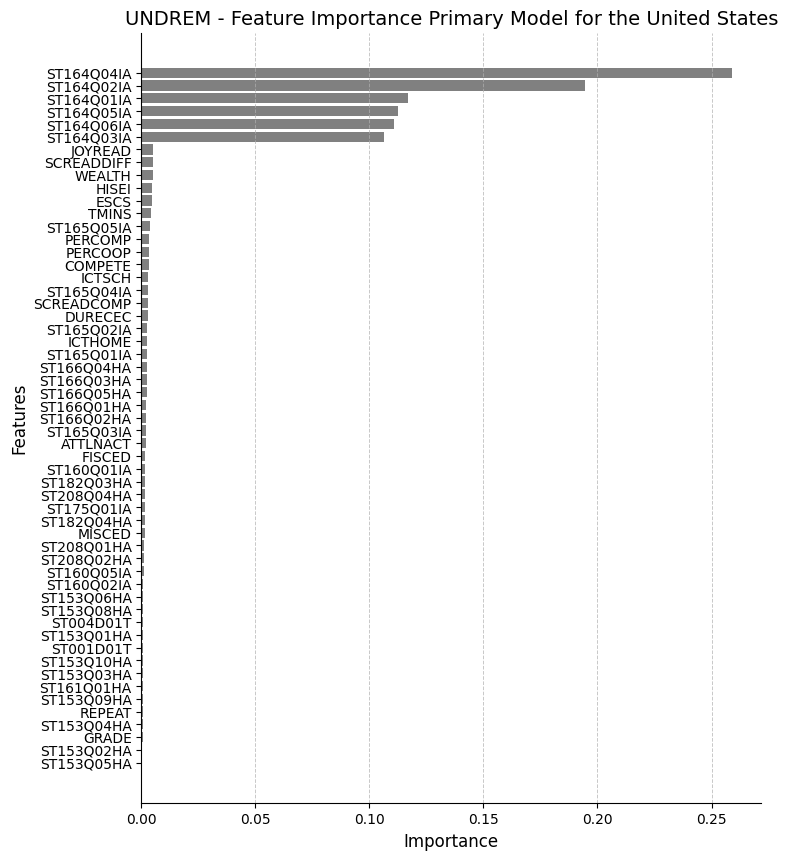

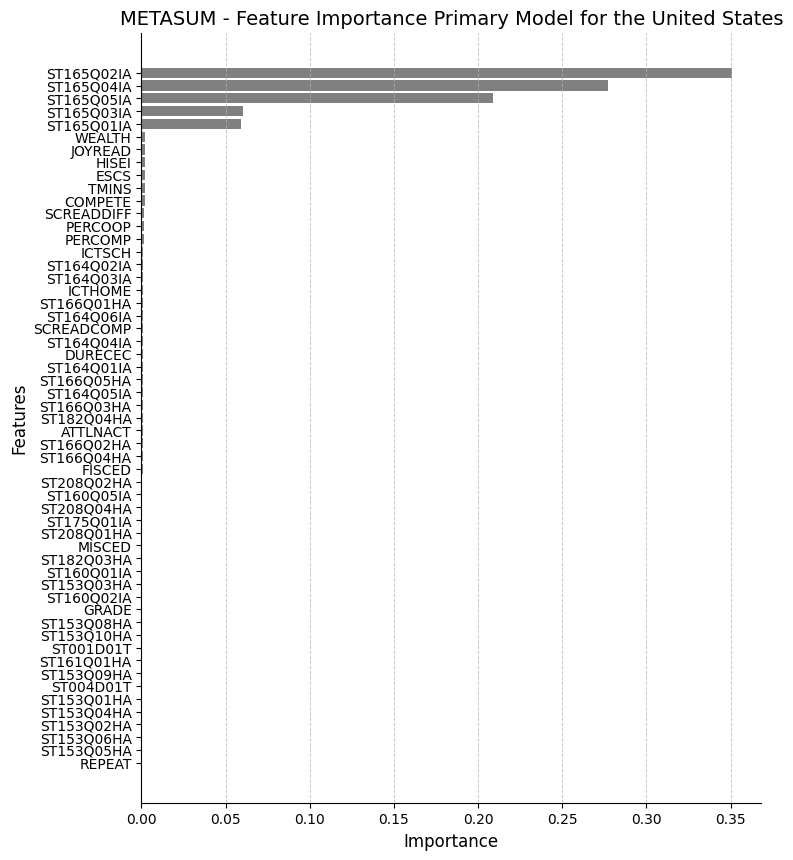

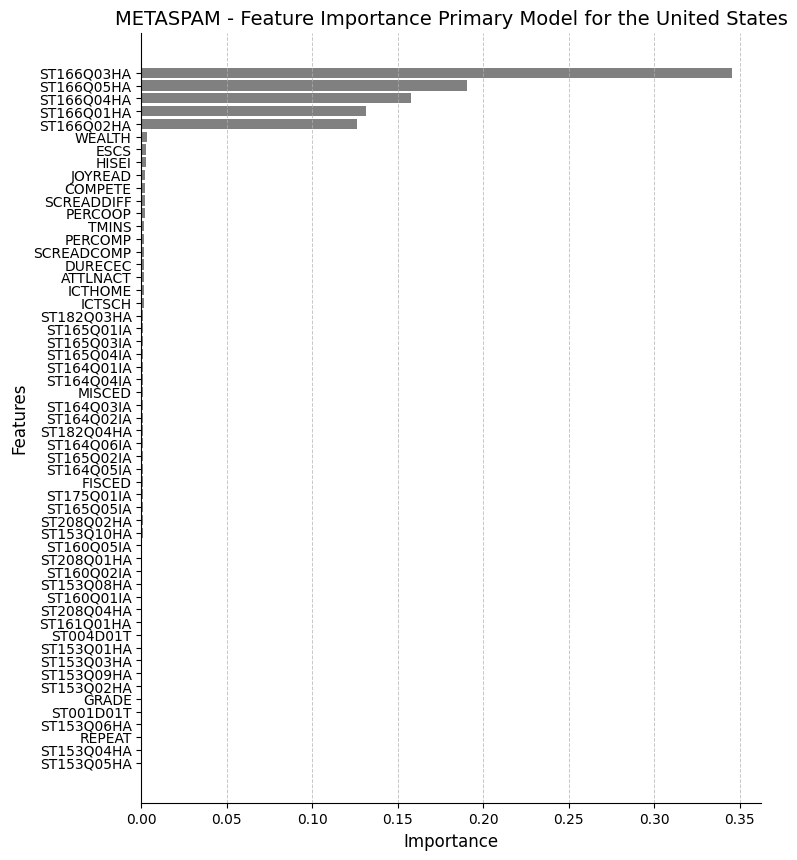

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importances and save as .png
def plot_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(8, 10))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='grey')

    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'{model_name} - Feature Importance Primary Model for the United States', fontsize=14)

    plt.yticks(fontsize=10)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=0.7)

    # Save the plot as a .png file with 600 dpi and tight bounding box
    plt.savefig(f'{model_name.lower()}_feature_importance_all_primary.png', dpi=600, bbox_inches='tight')

    plt.show()

# Get feature importances from the models
undrem_feature_importances = model_undrem.feature_importances_
metasum_feature_importances = model_metasum.feature_importances_
metaspam_feature_importances = model_metaspam.feature_importances_

# Assuming X.columns gives you the feature names, call the function for each model
plot_feature_importance(undrem_feature_importances, X.columns, 'UNDREM')
plot_feature_importance(metasum_feature_importances, X.columns, 'METASUM')
plot_feature_importance(metaspam_feature_importances, X.columns, 'METASPAM')

In [ ]:
# Create a DataFrame to hold the feature importance values for the UNDREM model
feature_importance_undrem_df = pd.DataFrame({'Feature': X.columns, 'Importance': undrem_feature_importances})

# Sort the DataFrame by the 'Importance' column in ascending order
feature_importance_undrem_df = feature_importance_undrem_df.sort_values(by='Importance', ascending=True)

# Print the sorted DataFrame
print(feature_importance_undrem_df)

       Feature  Importance
6   ST153Q05HA    0.000378
3   ST153Q02HA    0.000399
37       GRADE    0.000493
5   ST153Q04HA    0.000497
42      REPEAT    0.000508
9   ST153Q09HA    0.000584
15  ST161Q01HA    0.000646
4   ST153Q03HA    0.000649
10  ST153Q10HA    0.000659
0    ST001D01T    0.000698
2   ST153Q01HA    0.000707
1    ST004D01T    0.000757
8   ST153Q08HA    0.000768
7   ST153Q06HA    0.000831
12  ST160Q02IA    0.000906
13  ST160Q05IA    0.001245
35  ST208Q02HA    0.001291
34  ST208Q01HA    0.001295
38      MISCED    0.001374
33  ST182Q04HA    0.001397
14  ST175Q01IA    0.001473
36  ST208Q04HA    0.001499
32  ST182Q03HA    0.001523
11  ST160Q01IA    0.001573
39      FISCED    0.001709
53    ATTLNACT    0.001950
24  ST165Q03IA    0.001992
28  ST166Q02HA    0.002041
27  ST166Q01HA    0.002133
31  ST166Q05HA    0.002368
29  ST166Q03HA    0.002477
30  ST166Q04HA    0.002478
22  ST165Q01IA    0.002497
45     ICTHOME    0.002507
23  ST165Q02IA    0.002570
41     DURECEC    0.002678
4

In [ ]:
feature_importance_msum_df = pd.DataFrame({'Feature': X.columns, 'Importance': metasum_feature_importances})
feature_importance_msum_df = feature_importance_msum_df.sort_values(by='Importance', ascending=True)
print(feature_importance_msum_df)

       Feature  Importance
42      REPEAT    0.000156
6   ST153Q05HA    0.000157
7   ST153Q06HA    0.000238
3   ST153Q02HA    0.000243
5   ST153Q04HA    0.000247
2   ST153Q01HA    0.000260
1    ST004D01T    0.000283
9   ST153Q09HA    0.000300
15  ST161Q01HA    0.000320
0    ST001D01T    0.000320
10  ST153Q10HA    0.000331
8   ST153Q08HA    0.000342
37       GRADE    0.000409
12  ST160Q02IA    0.000412
4   ST153Q03HA    0.000416
11  ST160Q01IA    0.000429
32  ST182Q03HA    0.000500
38      MISCED    0.000501
34  ST208Q01HA    0.000516
14  ST175Q01IA    0.000538
36  ST208Q04HA    0.000564
13  ST160Q05IA    0.000593
35  ST208Q02HA    0.000599
39      FISCED    0.000746
30  ST166Q04HA    0.000784
28  ST166Q02HA    0.000785
53    ATTLNACT    0.000787
33  ST182Q04HA    0.000818
29  ST166Q03HA    0.000869
20  ST164Q05IA    0.000889
31  ST166Q05HA    0.000900
16  ST164Q01IA    0.000946
41     DURECEC    0.000948
19  ST164Q04IA    0.000960
49  SCREADCOMP    0.001008
21  ST164Q06IA    0.001012
2

In [ ]:
feature_importance_mspam_df = pd.DataFrame({'Feature': X.columns, 'Importance': metaspam_feature_importances})
feature_importance_mspam_df = feature_importance_mspam_df.sort_values(by='Importance', ascending=True)
print(feature_importance_mspam_df)

       Feature  Importance
6   ST153Q05HA    0.000150
5   ST153Q04HA    0.000202
42      REPEAT    0.000208
7   ST153Q06HA    0.000218
0    ST001D01T    0.000225
37       GRADE    0.000248
3   ST153Q02HA    0.000261
9   ST153Q09HA    0.000266
4   ST153Q03HA    0.000266
2   ST153Q01HA    0.000273
1    ST004D01T    0.000356
15  ST161Q01HA    0.000365
36  ST208Q04HA    0.000385
11  ST160Q01IA    0.000438
8   ST153Q08HA    0.000489
12  ST160Q02IA    0.000553
34  ST208Q01HA    0.000581
13  ST160Q05IA    0.000583
10  ST153Q10HA    0.000677
35  ST208Q02HA    0.000683
26  ST165Q05IA    0.000692
14  ST175Q01IA    0.000713
39      FISCED    0.000730
20  ST164Q05IA    0.000762
23  ST165Q02IA    0.000819
21  ST164Q06IA    0.000835
33  ST182Q04HA    0.000841
17  ST164Q02IA    0.000866
18  ST164Q03IA    0.000866
38      MISCED    0.000867
19  ST164Q04IA    0.000891
16  ST164Q01IA    0.000929
25  ST165Q04IA    0.000985
24  ST165Q03IA    0.001030
22  ST165Q01IA    0.001060
32  ST182Q03HA    0.001077
4

## Testing the impact of non-cognitive variables

In [ ]:
# Remove Direct Impact Variables
columns_to_remove = ['ST164Q01IA', 'ST164Q02IA',
'ST164Q03IA', 'ST164Q04IA', 'ST164Q05IA', 'ST164Q06IA', 'ST165Q01IA', 'ST165Q02IA', 'ST165Q03IA', 'ST165Q04IA', 'ST165Q05IA', 'ST166Q01HA', 'ST166Q02HA', 'ST166Q03HA', 'ST166Q04HA', 'ST166Q05HA']
X_train_new = X_train.drop(columns=columns_to_remove)


In [ ]:
# Train New Models
# A. Meta-cognition of Reading: Understanding and Remembering
model_undrem_new = RandomForestRegressor(n_estimators=100)
model_undrem_new.fit(X_train_new, y_undrem_train)

RandomForestRegressor()

In [ ]:
# B. Meta-cognition of Reading: Summarizing
model_metasum_new = RandomForestRegressor(n_estimators=100)
model_metasum_new.fit(X_train_new, y_metasum_train)

RandomForestRegressor()

In [ ]:
# C. Meta-cognition of Reading: Assessing Credibility
model_metaspam_new = RandomForestRegressor(n_estimators=100)
model_metaspam_new.fit(X_train_new, y_metaspam_train)

RandomForestRegressor()

In [ ]:
# Validitaning Using Test Set
X_test_new = X_test.drop(columns=columns_to_remove)
y_undrem_pred_test_new = model_undrem_new.predict(X_test_new)
y_metasum_pred_test_new = model_metasum_new.predict(X_test_new)
y_metaspam_pred_test_new = model_undrem_new.predict(X_test_new)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to print performance metrics
def print_metrics(model, X, y, dataset_type):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)

    print(f"{dataset_type} - Noncognitive Model: Mean Squared Error for the United States: {mse}")
    print(f"{dataset_type} - Noncognitive Model: Mean Absolute Error for the United States: {mae}")
    print(f"{dataset_type} - Noncognitive Model: R-squared Score for the United States: {r2}")

# Calculate and print performance metrics for new models
print("New UNDREM Model:")
print_metrics(model_undrem_new, X_test_new, y_undrem_test, "Test")

print("\nNew METASUM Model:")
print_metrics(model_metasum_new, X_test_new, y_metasum_test, "Test")

print("\nNew METASPAM Model:")
print_metrics(model_metaspam_new, X_test_new, y_metaspam_test, "Test")

New UNDREM Model:
Test - Noncognitive Model: Mean Squared Error for the United States: 0.8620761718817423
Test - Noncognitive Model: Mean Absolute Error for the United States: 0.7617670509045116
Test - Noncognitive Model: R-squared Score for the United States: 0.08469795352047427

New METASUM Model:
Test - Noncognitive Model: Mean Squared Error for the United States: 0.8386191168891856
Test - Noncognitive Model: Mean Absolute Error for the United States: 0.7512105907879998
Test - Noncognitive Model: R-squared Score for the United States: 0.16386903126686392

New METASPAM Model:
Test - Noncognitive Model: Mean Squared Error for the United States: 0.8081171236516139
Test - Noncognitive Model: Mean Absolute Error for the United States: 0.7558403759572289
Test - Noncognitive Model: R-squared Score for the United States: 0.1508410156290496


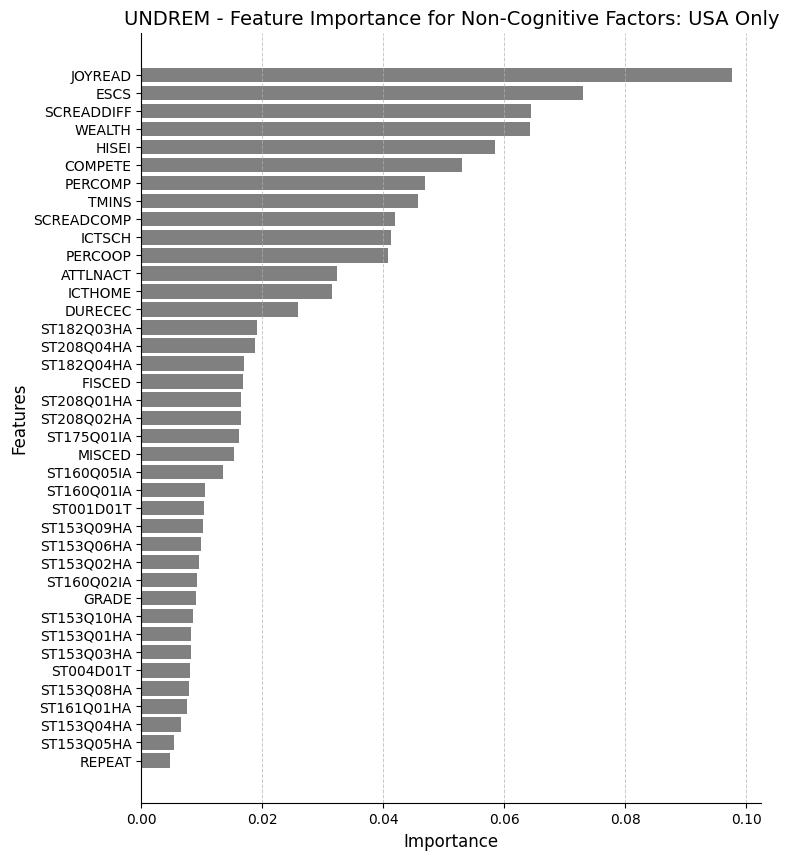

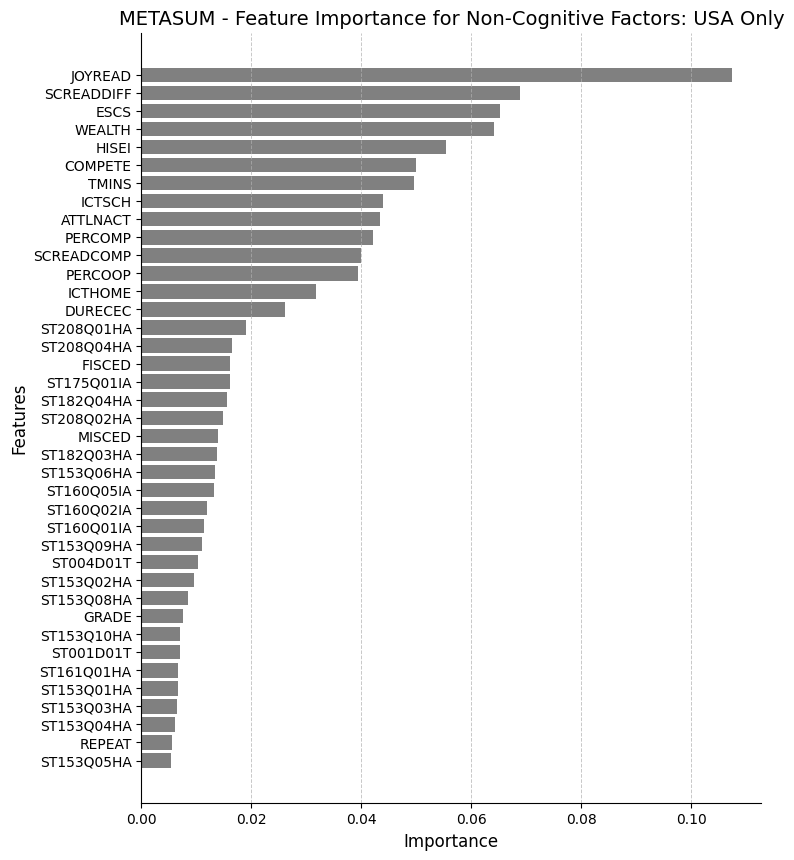

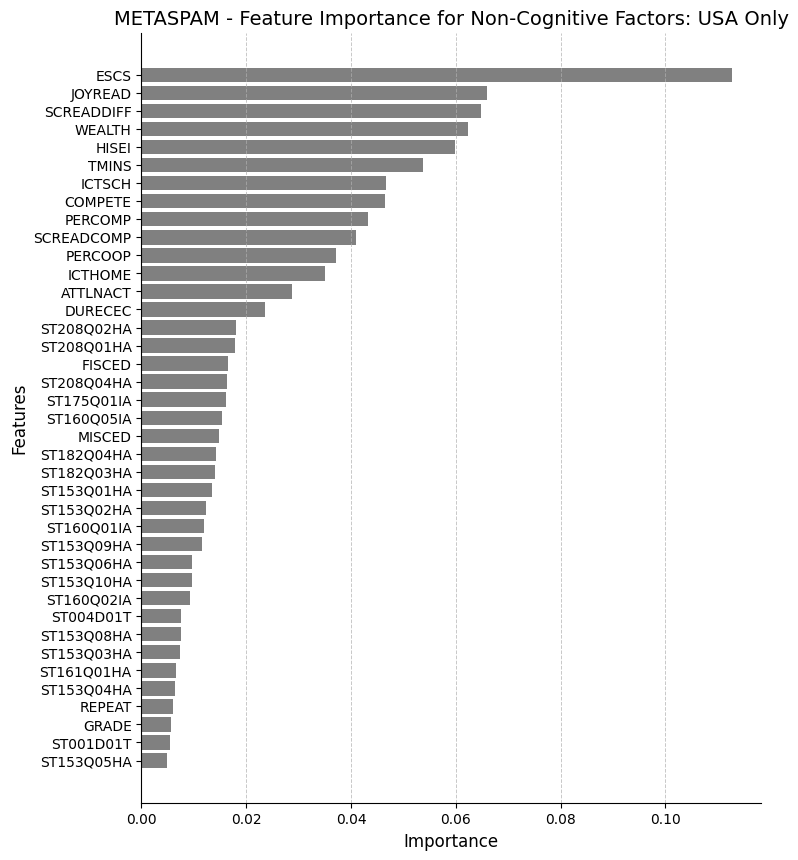

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importances and save as .png
def plot_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(8, 10))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='grey')

    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'{model_name} - Feature Importance for Non-Cognitive Factors: USA Only', fontsize=14)

    plt.yticks(fontsize=10)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=0.7)

    # Save the plot as a .png file with 600 dpi and tight bounding box
    plt.savefig(f'{model_name.lower()}_feature_importance_non_cognitive_usa.png', dpi=600, bbox_inches='tight')

    plt.show()

# Get feature importances from the new models
undrem_feature_importances_new = model_undrem_new.feature_importances_
metasum_feature_importances_new = model_metasum_new.feature_importances_
metaspam_feature_importances_new = model_metaspam_new.feature_importances_

# Assuming X_train_new.columns gives you the feature names, call the function for each new model
plot_feature_importance(undrem_feature_importances_new, X_train_new.columns, 'UNDREM')
plot_feature_importance(metasum_feature_importances_new, X_train_new.columns, 'METASUM')
plot_feature_importance(metaspam_feature_importances_new, X_train_new.columns, 'METASPAM')

In [ ]:
# Function to print feature importances
def print_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(f"Feature Importance for {model_name}")
    print("---------------------------------------")
    print(feature_importance_df)
    print("\n")

# Get feature importances from the new models
undrem_feature_importances_new = model_undrem_new.feature_importances_
metasum_feature_importances_new = model_metasum_new.feature_importances_
metaspam_feature_importances_new = model_metaspam_new.feature_importances_

# Assuming X_train_new.columns gives you the feature names, call the function for each new model
print_feature_importance(undrem_feature_importances_new, X_train_new.columns, 'New UNDREM')
print_feature_importance(metasum_feature_importances_new, X_train_new.columns, 'New METASUM')
print_feature_importance(metaspam_feature_importances_new, X_train_new.columns, 'New METASPAM')

Feature Importance for New UNDREM
---------------------------------------
       Feature  Importance
32     JOYREAD    0.097607
28        ESCS    0.072937
34  SCREADDIFF    0.064476
31      WEALTH    0.064316
24       HISEI    0.058461
38     COMPETE    0.053010
35     PERCOMP    0.046911
27       TMINS    0.045664
33  SCREADCOMP    0.041866
30      ICTSCH    0.041266
36     PERCOOP    0.040703
37    ATTLNACT    0.032285
29     ICTHOME    0.031462
25     DURECEC    0.025965
16  ST182Q03HA    0.019187
20  ST208Q04HA    0.018729
17  ST182Q04HA    0.016966
23      FISCED    0.016763
18  ST208Q01HA    0.016486
19  ST208Q02HA    0.016448
14  ST175Q01IA    0.016076
22      MISCED    0.015347
13  ST160Q05IA    0.013520
11  ST160Q01IA    0.010527
0    ST001D01T    0.010405
9   ST153Q09HA    0.010150
7   ST153Q06HA    0.009780
3   ST153Q02HA    0.009542
12  ST160Q02IA    0.009128
21       GRADE    0.009010
10  ST153Q10HA    0.008558
2   ST153Q01HA    0.008245
4   ST153Q03HA    0.008216
1    ST0